In [20]:
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
# Function grabbed by Vitor
def extract_properties_from_log(log_file_path):
    data = []
    search_token = 'TotEng'
    df_head = None
    with open(log_file_path, 'r') as f:
        for line in f:
            if search_token in line:
                df_head = line.split()
            try:
                properties = list(map(float, line.split()))
                data.append(properties)
            except:
                continue

    # There is some [] at the end of the data for some reason so I'm removing it
    while [] in data:
        del data[data.index([])]

    # Dropna because if we got some other numeric row we need to eliminate it.
    df = pd.DataFrame(data, columns=df_head).dropna(axis=0)
    return df

In [22]:
# Usage example
common_path = 'graphene_single_layer_LJ_40C_log.txt' # path of the lammps log file
LJ_data = extract_properties_from_log(common_path)

In [23]:
LJ_data

,Step,Temp,Press,Volume,Lx,Density,PotEng,TotEng
0,0.0,0.000000,1.940210e+08,676.0,13.0,1.180132,476815.89000,476815.89000
1,96.0,0.000000,2.652900e+06,676.0,13.0,1.180132,6295.56490,6295.56490
3,96.0,0.000000,2.652900e+06,676.0,13.0,1.180132,6295.56490,6295.56490
4,100.0,0.064952,2.652897e+06,676.0,13.0,1.180132,6295.55720,6295.56470
5,200.0,1616.209700,4.259653e+05,676.0,13.0,1.180132,894.65764,1082.54460
...,...,...,...,...,...,...,...,...
500,49700.0,49.131062,1.530524e+05,676.0,13.0,1.180132,277.22491,282.93648
501,49800.0,52.187452,1.533562e+05,676.0,13.0,1.180132,277.88504,283.95192
502,49900.0,57.052457,1.535609e+05,676.0,13.0,1.180132,278.27652,284.90896
503,50000.0,62.745993,1.532293e+05,676.0,13.0,1.180132,277.38325,284.67758


(20, 80)

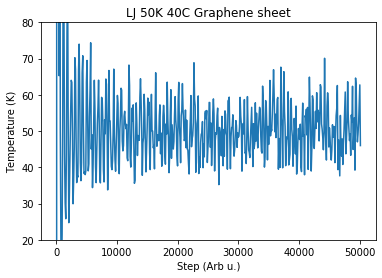

In [34]:
plt.plot( LJ_data['Step'] , LJ_data['Temp'] , label='Temperature')
plt.ylabel('Temperature (K)')
plt.xlabel('Step (Arb u.)')
plt.title('LJ 50K 40C Graphene sheet')
plt.ylim(20,80)

(200, 400)

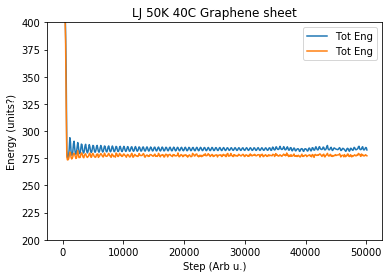

In [30]:
plt.plot( LJ_data['Step'] , LJ_data['TotEng'] , label='Tot Eng')
plt.plot( LJ_data['Step'] , LJ_data['PotEng'] , label='Tot Eng')
plt.ylabel('Energy (units?)')
plt.xlabel('Step (Arb u.)')
plt.title('LJ 50K 40C Graphene sheet')
plt.legend()
plt.ylim(200, 400)

In [26]:
# Usage example
common_path = 'graphene_single_layer_ReaxFF_40_C_log.txt' # path of the lammps log file
ReaxtFF_data = extract_properties_from_log(common_path)

In [27]:
ReaxtFF_data

,Step,Temp,Press,Volume,Lx,Density,PotEng,TotEng
0,0.0,0.000000,285703.9000,676.0,13.0,1.180132,-6221.1328,-6221.1328
1,99.0,0.000000,37012.8790,676.0,13.0,1.180132,-6789.2155,-6789.2155
3,99.0,0.000000,37012.8790,676.0,13.0,1.180132,-6789.2155,-6789.2155
4,100.0,5.150654,35835.0300,676.0,13.0,1.180132,-6789.9204,-6789.3216
5,200.0,644.252090,72507.2780,676.0,13.0,1.180132,-6725.2359,-6650.3405
...,...,...,...,...,...,...,...,...
500,49700.0,73.357444,-14289.0080,676.0,13.0,1.180132,-6912.1846,-6903.6567
501,49800.0,83.115396,-3272.0365,676.0,13.0,1.180132,-6907.4333,-6897.7710
502,49900.0,43.504268,-49039.5000,676.0,13.0,1.180132,-6884.5380,-6879.4805
503,50000.0,129.607200,-51906.7440,676.0,13.0,1.180132,-6866.3494,-6851.2824


Text(0.5, 1.0, 'ReaxtFF 50K 40C Graphene sheet')

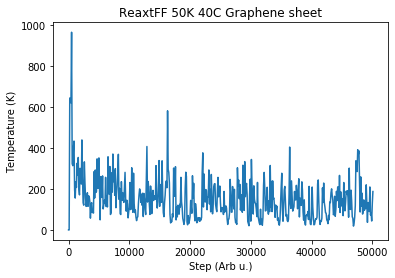

In [36]:
plt.plot( ReaxtFF_data['Step'] , ReaxtFF_data['Temp'] , label='Temperature')
plt.ylabel('Temperature (K)')
plt.xlabel('Step (Arb u.)')
plt.title('ReaxtFF 50K 40C Graphene sheet')

Text(0.5, 1.0, 'ReaxtFF 50K 40C Graphene sheet')

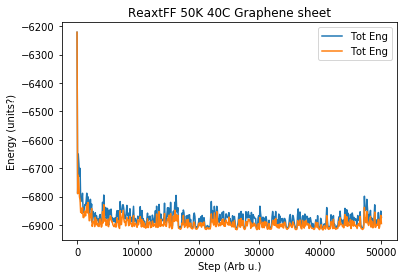

In [31]:
plt.plot( ReaxtFF_data['Step'] , ReaxtFF_data['TotEng'] , label='Tot Eng')
plt.plot( ReaxtFF_data['Step'] , ReaxtFF_data['PotEng'] , label='Tot Eng')
plt.ylabel('Energy (units?)')
plt.xlabel('Step (Arb u.)')
plt.legend()
plt.title('ReaxtFF 50K 40C Graphene sheet')